In [34]:
import numpy as np
import pandas as pd

# IMPLEMENTATION OF DECISSION FOREST & RANDOM FOREST REGRESSOR
# 21BCE11373_ABHISHEK

In [35]:
dataset = pd.read_csv("/kaggle/input/50-startups/50_Startups.csv")

In [36]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['State'] = le.fit_transform(dataset['State'])


In [39]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [40]:
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4:5].values

In [41]:
x.shape

(50, 4)

In [42]:
y.shape

(50, 1)

In [43]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,3:4]).toarray()
x = np.delete(x,3,axis = 1)
x = np.concatenate((z,x),axis = 1)

In [44]:
x.shape

(50, 6)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =0)

In [46]:
x_train.shape

(40, 6)

## DECISION TREE REGRESSOR

In [47]:
from sklearn.tree import  DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [48]:
ydtr = dtr.predict(x_test)

In [49]:
ydtr

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 107404.34,
        69758.98,  97427.84, 108733.99, 182901.99])

In [50]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

In [51]:
accuratdtr = r2_score(y_test,ydtr)

In [52]:
accuratdtr

0.9594341740623319

In [53]:
from sklearn import tree
tree.export_graphviz(dtr)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[3] <= 75791.363\\nsquared_error = 1637470908.557\\nsamples = 40\\nvalue = 109446.447"] ;\n1 [label="x[3] <= 26152.345\\nsquared_error = 647928473.775\\nsamples = 21\\nvalue = 79233.588"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[3] <= 771.14\\nsquared_error = 348868031.032\\nsamples = 8\\nvalue = 51723.646"] ;\n1 -> 2 ;\n3 [label="x[5] <= 22586.529\\nsquared_error = 140587463.397\\nsamples = 3\\nvalue = 30971.513"] ;\n2 -> 3 ;\n4 [label="x[4] <= 93585.035\\nsquared_error = 11855350.786\\nsamples = 2\\nvalue = 39116.57"] ;\n3 -> 4 ;\n5 [label="squared_error = 0.0\\nsamples = 1\\nvalue = 35673.41"] ;\n4 -> 5 ;\n6 [label="squared_error = -0.0\\nsamples = 1\\nvalue = 42559.73"] ;\n4 -> 6 ;\n7 [label="squared_error = 0.0\\nsamples = 1\\nvalue = 14681.4"] ;\n3 -> 7 ;\n8 [label="x[5] <= 222557.789\\nsquared_error = 60411391.846\\nsamples = 5\\nvalue = 64174

In [57]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 5.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=856351b7e3c3eda58fcee222640dbacf918efe5d60d527d60a4038c78316c6a0
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


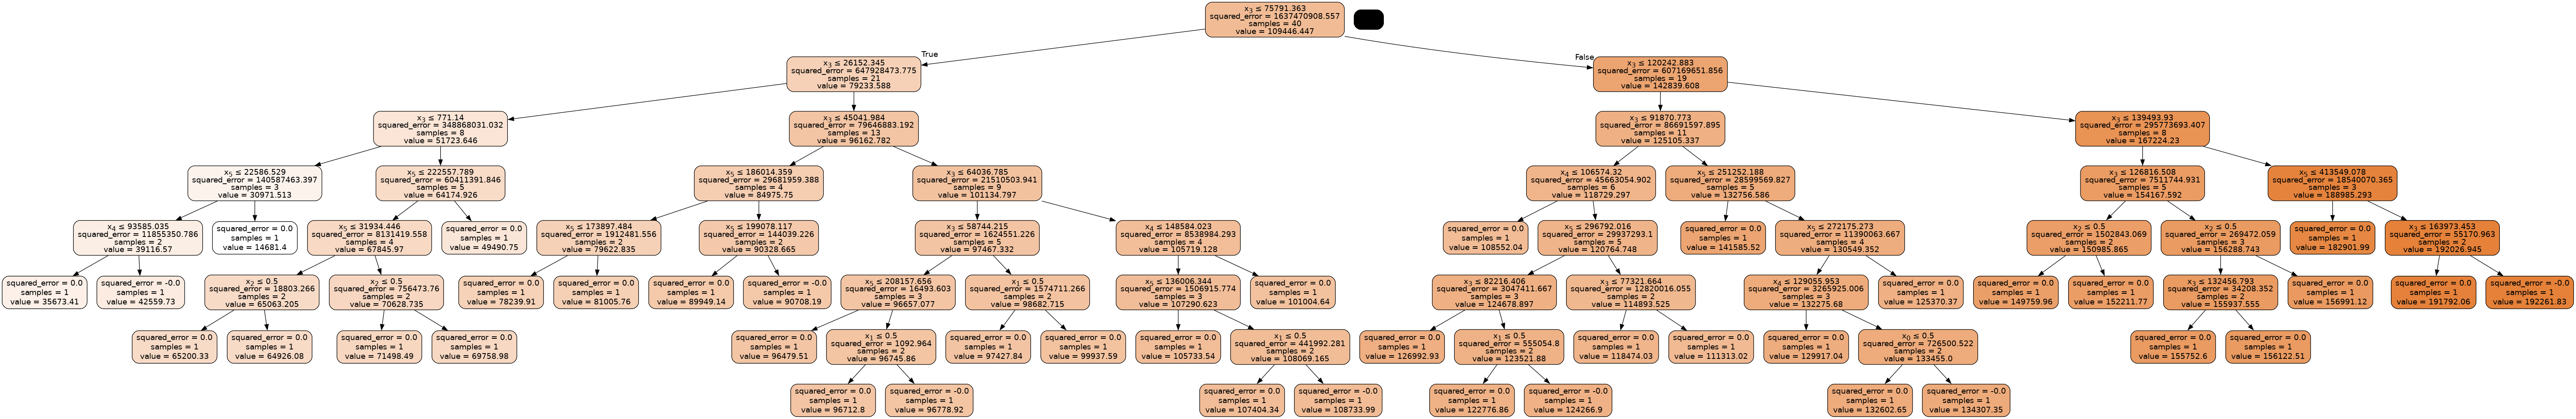

In [58]:
import io
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = io.StringIO()  # Use io.StringIO() instead of StringIO

# Replace 'dtr' with your decision tree model
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [59]:
yd = dtr.predict([[1,0,0,12345,23456,6789]])

In [60]:
yd

array([65200.33])

### RANDOM FORESET REGRESSOR

In [61]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(n_estimators =30,random_state = 0)
rdr.fit(x_train,y_train)

/tmp/ipykernel_32/1033068819.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdr.fit(x_train,y_train)


RandomForestRegressor(n_estimators=30, random_state=0)

In [62]:
yrdr = rdr.predict(x_test)

In [63]:
accuracy = r2_score(y_test,yrdr)

In [64]:
accuracy

0.9713481195006712